In [3]:
import pandas as pd
df = pd.read_excel('Cr-poisoning.xlsx')

In [9]:
import numpy as np

In [18]:
X1 = df['log pO2 /bar'].tolist()
X2 = df['log CrO3 /bar'].tolist()
X = np.c_[X1,X2]
y = df['reaction product']

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [83]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf = SVC(gamma=0.5, kernel='linear',C = 20)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1, 0, 0, 0, 0],
       [0, 6, 0, 0, 0],
       [0, 0, 4, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

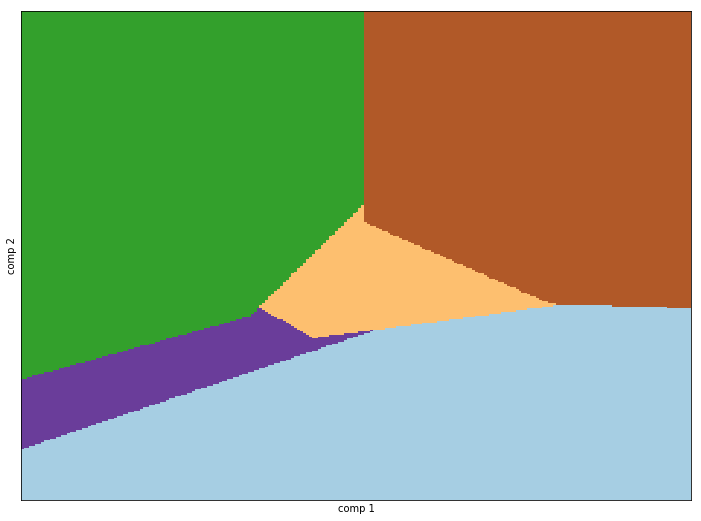

In [85]:
import matplotlib.pyplot as plt
from random import sample
idx = sample(list(df.index), int(df.shape[0]))
h = .02
x_min, x_max  = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
encoder = {'SrO': 1, 'SrCrO3': 2, 'Sr3Cr2O8': 3,'Sr2CrO4':4,'SrCrO4':5}
Z = np.array([encoder[z] for z in Z]).reshape(xx.shape)
plt.figure(figsize=(12, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
col_map = {'SrO': 'olive', 'SrCrO3': 'navy', 'Sr3Cr2O8': 'magenta','Sr2CrO4':"blue",'SrCrO4':"yellow"}
plt.xlabel('comp 1')
plt.ylabel('comp 2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

In [62]:
len(X_train[:, 0])

60